# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


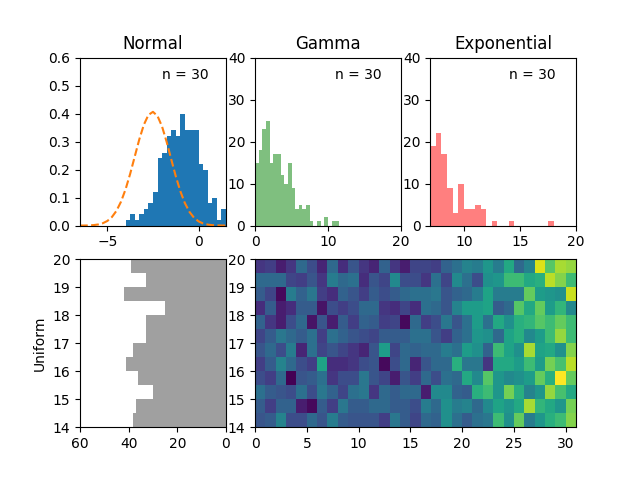

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import matplotlib.mlab as mlab

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# Use GridSpec to create five subplots on a 2 X 3 grid.
fig = plt.figure()
gspec = gridspec.GridSpec(2,3)
normal_histogram =      plt.subplot(gspec[0, 0:1])
gamma_histogram =       plt.subplot(gspec[0, 1:2])
exponential_histogram = plt.subplot(gspec[0, 2:])
uniform_histogram =     plt.subplot(gspec[1, 0:1])
heatmap =               plt.subplot(gspec[1, 1:])

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    global bb
    global xxu
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()

    # Format and display a histogram with samples from normal data.
    # Increase the values in the samples slightly when halfway through
    # the animation so that the histograms slowly shift right.
    normal_histogram.cla()
    if curr > n*0.5:
        xn = np.random.choice(x1 + ((curr - n*0.5) * 0.1), size=200)
    else:
        xn = np.random.choice(x1, size=200)
    nbins = np.arange(-6.5, 5, 0.25)
    normal_histogram.hist(xn, bins=nbins, normed=True)
    normal_histogram.axis([-6.5,1.5,0,0.6])
    normal_histogram.set_title('Normal')
    normal_histogram.annotate('n = {}'.format(curr), [-2,0.525])
    # graph a line of the complete normal data (x1) using the normpdf method.
    # This will make the histogram shifting more apparent.
    y = mlab.normpdf(nbins, x1.mean(), x1.std())
    normal_histogram.plot(nbins, y, '--')

    # Format and display a histogram with samples from gamma data. 
    gamma_histogram.cla()
    xg = np.random.choice(x2, size=200)
    gbins = np.arange(0, 21, 0.5)
    gamma_histogram.hist(xg, bins=gbins, color='green', alpha=0.5)
    gamma_histogram.axis([0,20,0,40])
    gamma_histogram.set_title('Gamma')
    gamma_histogram.annotate('n = {}'.format(curr), [11,35])
    
    # Format and display a histogram with samples from exponential data.
    exponential_histogram.cla()
    xe = np.random.choice(x3, size=100)
    ebins = np.arange(7, 21, 0.5)
    exponential_histogram.hist(xe, bins=ebins, color='red', alpha=0.5)
    exponential_histogram.axis([7,20,0,40])
    exponential_histogram.set_title('Exponential')
    exponential_histogram.annotate('n = {}'.format(curr), [14,35])
    
    # Format and display a histogram with samples from uniform data.
    # Use this to create a "waterfall" heatmap.
    # Increase the number of samples taken when halfway through the 
    # animation so that the "waterfall" gradually brightens.
    uniform_histogram.cla()
    if curr > n*0.5:
        xu = np.random.choice(x4, size=(200 + (curr - n*0.5) * 15))
    else:
        xu = np.random.choice(x4, size=200)
    ubins = np.arange(14, 21, 0.5)
    uniform_histogram.hist(xu, bins=ubins, orientation='horizontal', facecolor='grey', alpha=0.75)
    uniform_histogram.axis([0,60,14,20])
    uniform_histogram.set_ylabel('Uniform')
    uniform_histogram.invert_xaxis()
    # bb and xxu are "global" arrays that contain cumulative data used to build the
    # "waterfall" heatmap.  
    if curr == 0:
        bb = [0]*len(xu)
        xxu = xu
    else:
        bb = bb + [curr]*len(xu)
        xxu = np.append(xxu,xu)
    _ = heatmap.hist2d(bb, xxu, bins=[hm_x, hm_y], )
    # I couldn't get the colorbar to work, nor could I figure out how to keep the colors in
    # the first half from darkening as the second half was being created.
    #plt.colorbar(heatmap)
    
#
n = 30
# Setup variables for the "waterfall" heatmap.
bb=[]
xxu=[]
hm_x = []
hm_y = [14,14.5,15,15.5,16,16.5,17,17.5,18,18.5,19,19.5,20]
for i in range(0,n+2):
    hm_x.append(i)
    
a = animation.FuncAnimation(fig, update, interval=100)